In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')


df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv", parse_dates=['Date'])

df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [134]:
df['Total Cases'] = df[['Confirmed','Recovered','Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [85]:
#worldwide cases

worldwide_df = df.groupby(['Date']).sum()
worldwide_df.head()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,557,30,17,604
2020-01-23,655,32,18,705
2020-01-24,941,39,26,1006
2020-01-25,1433,42,42,1517
2020-01-26,2118,56,56,2230


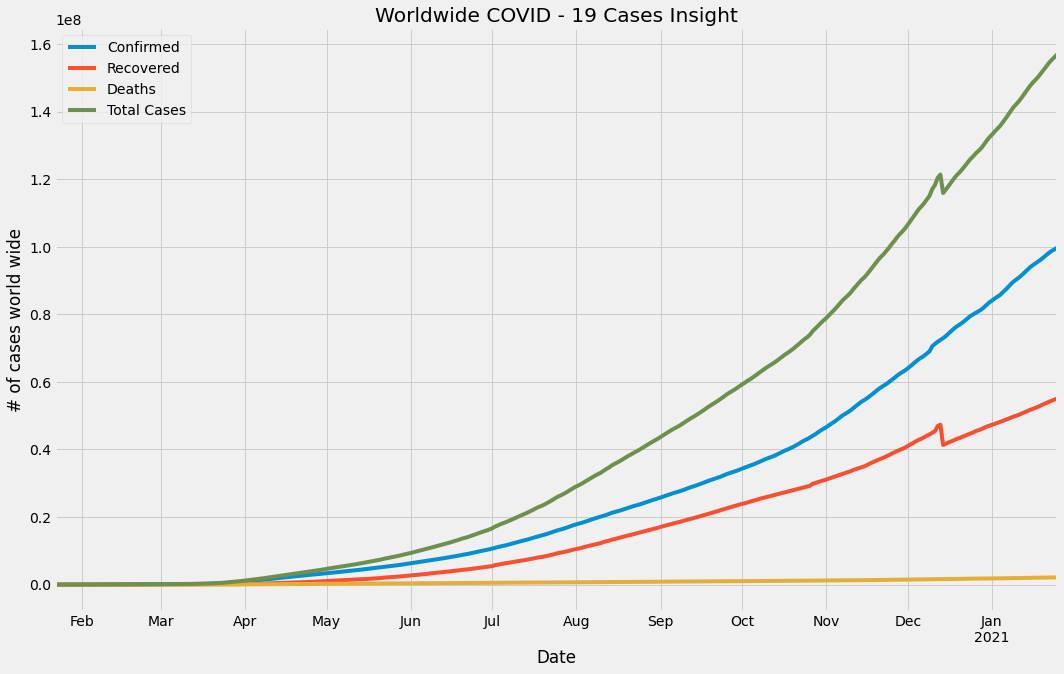

In [86]:
w = worldwide_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('# of cases world wide')
w.title.set_text("Worldwide COVID - 19 Cases Insight")
plt.show()

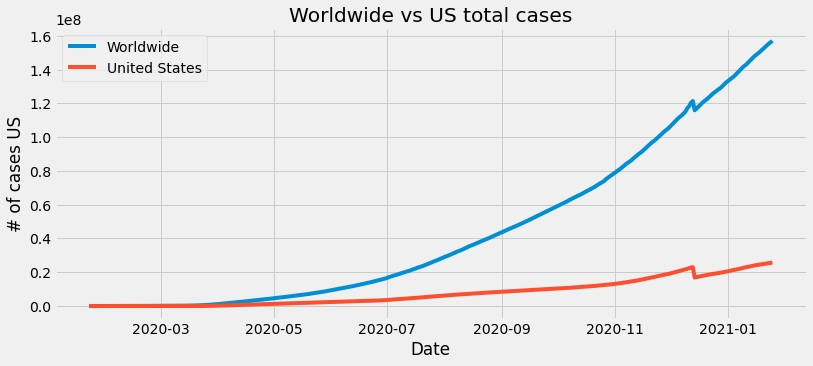

In [87]:
us_df = df [df['Country']=='US'].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(us_df[['Total Cases']], label='United States')

ax.set_xlabel('Date')
ax.set_ylabel('# of cases US')
ax.title.set_text("Worldwide vs US total cases")

plt.legend(loc='upper left')
plt.show()

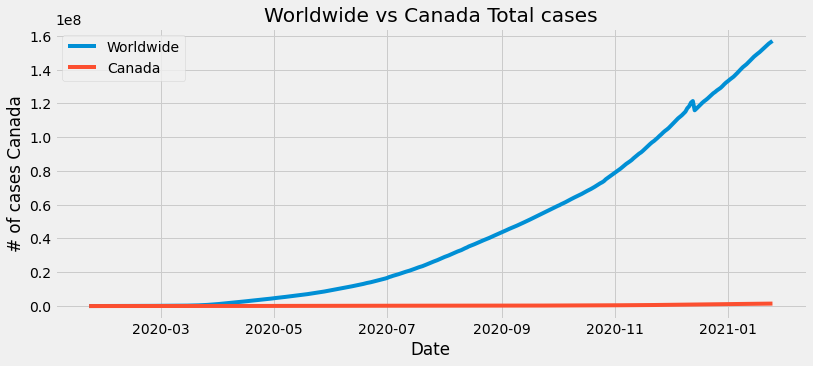

In [88]:
can_df = df [df['Country']=='Canada'].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,5))
ab = fig.add_subplot(111)

ab.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ab.plot(can_df[['Total Cases']], label='Canada')

ab.set_xlabel('Date')
ab.set_ylabel('# of cases Canada')
ab.title.set_text("Worldwide vs Canada Total cases")

plt.legend(loc='upper left')
plt.show()

In [89]:
# United States Daily Cases and Deaths

us_df = us_df.reset_index()
us_df.head()

,Date,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5


In [90]:
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed
0,2020-01-22,1,0,0,1,NaN
1,2020-01-23,1,0,0,1,0.0
2,2020-01-24,2,0,0,2,1.0
3,2020-01-25,2,0,0,2,0.0
4,2020-01-26,5,0,0,5,3.0
...,...,...,...,...,...,...
365,2021-01-21,24654566,0,410349,25064915,193023.0
366,2021-01-22,24844600,0,414107,25258707,190034.0
367,2021-01-23,25014756,0,417439,25432195,170156.0
368,2021-01-24,25145947,0,419214,25565161,131191.0


In [91]:
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())
us_df

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Deaths
0,2020-01-22,1,0,0,1,NaN,NaN
1,2020-01-23,1,0,0,1,0.0,0.0
2,2020-01-24,2,0,0,2,1.0,0.0
3,2020-01-25,2,0,0,2,0.0,0.0
4,2020-01-26,5,0,0,5,3.0,0.0
...,...,...,...,...,...,...,...
365,2021-01-21,24654566,0,410349,25064915,193023.0,4202.0
366,2021-01-22,24844600,0,414107,25258707,190034.0,3758.0
367,2021-01-23,25014756,0,417439,25432195,170156.0,3332.0
368,2021-01-24,25145947,0,419214,25565161,131191.0,1775.0


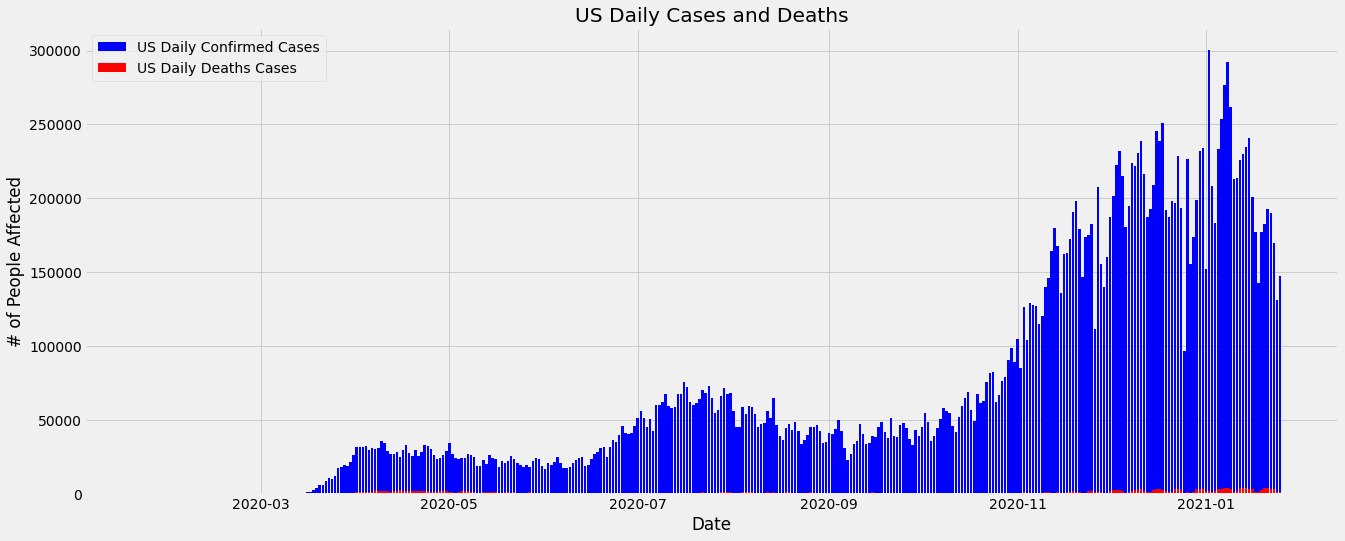

In [92]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'], color='b', label='US Daily Confirmed Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color='r', label='US Daily Deaths Cases')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('US Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

In [93]:
# Canada Daily Cases and Deaths

can_df = can_df.reset_index()
can_df.head()

,Date,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,1,0,0,1


In [94]:
can_df['Daily Confirmed'] = can_df['Confirmed'].sub(can_df['Confirmed'].shift())
can_df

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed
0,2020-01-22,0,0,0,0,NaN
1,2020-01-23,0,0,0,0,0.0
2,2020-01-24,0,0,0,0,0.0
3,2020-01-25,0,0,0,0,0.0
4,2020-01-26,1,0,0,1,1.0
...,...,...,...,...,...,...
365,2021-01-21,736441,652246,18510,1407197,6111.0
366,2021-01-22,742268,659185,18633,1420086,5827.0
367,2021-01-23,747362,663552,18691,1429605,5094.0
368,2021-01-24,752040,670938,18767,1441745,4678.0


In [95]:
can_df['Daily Confirmed'] = can_df['Confirmed'].sub(can_df['Confirmed'].shift())
can_df['Daily Deaths'] = can_df['Deaths'].sub(can_df['Deaths'].shift())
can_df

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Deaths
0,2020-01-22,0,0,0,0,NaN,NaN
1,2020-01-23,0,0,0,0,0.0,0.0
2,2020-01-24,0,0,0,0,0.0,0.0
3,2020-01-25,0,0,0,0,0.0,0.0
4,2020-01-26,1,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...
365,2021-01-21,736441,652246,18510,1407197,6111.0,94.0
366,2021-01-22,742268,659185,18633,1420086,5827.0,123.0
367,2021-01-23,747362,663552,18691,1429605,5094.0,58.0
368,2021-01-24,752040,670938,18767,1441745,4678.0,76.0


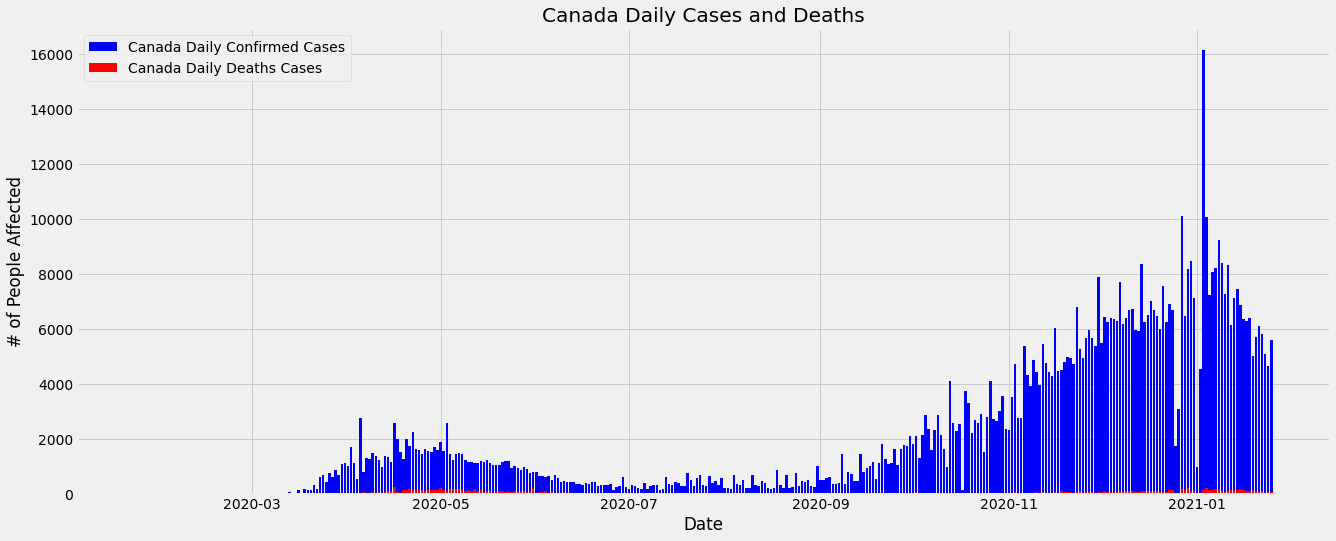

In [96]:
fig = plt.figure(figsize=(20,8))
ab = fig.add_subplot(111)

ab.bar(can_df['Date'], can_df['Daily Confirmed'], color='b', label='Canada Daily Confirmed Cases')
ab.bar(can_df['Date'], can_df['Daily Deaths'], color='r', label='Canada Daily Deaths Cases')
ab.set_xlabel('Date')
ab.set_ylabel('# of People Affected')
ab.title.set_text('Canada Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

<ipython-input-135-66a69d690699>:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')


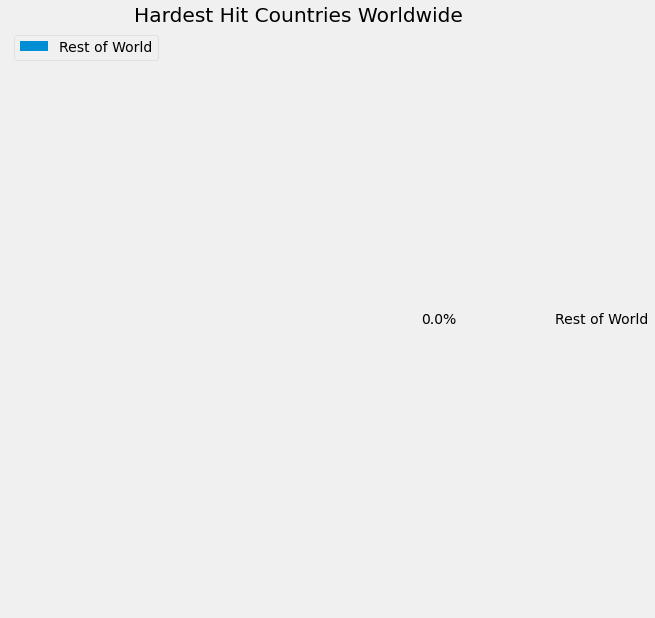

In [135]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc='upper left')
plt.show()
